Učitavanje potrebnih biblioteka

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore

Kontrola kvalitete podataka

Učitavanje podataka iz originalnog dataseta (appliancesData.csv)

In [2]:
appliancesData = pd.read_csv('appliancesData.csv')

Prepoznavanje nedostajućih vrijednosti

In [3]:
# Ispis broja nedostajućih vrijednosti u učitanom setu podataka
print("Broj nedostajućih vrijednosti je: ", appliancesData.isnull().sum().sum(), "\n")
display(appliancesData.isnull().sum())

Broj nedostajućih vrijednosti je:  0 



date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Zadani dataset nema nedostajućih vrijednosti te nema potrebe za nadopunom ili zamjenom podataka, ali kada bi bilo potrebno koristio bi se priloženi zakomentirani kod ('-1' i 'missing' se mogu zamijeniti s bilo kojim drugim brojem ili stringom)

In [4]:
""" # Ispis redaka koji sadrže nedostajuće vrijednosti
print(appliancesData[appliancesData.isna().any(axis=1)])
for col in appliancesData.columns:
    if pd.api.types.is_numeric_dtype(appliancesData[col]):
        appliancesData[col] = appliancesData[col].fillna(-1)
    else:
        appliancesData[col] = appliancesData[col].fillna("missing")
# Ispis broja nedostajućih vrijednosti nakon zamjene
print("Broj nedostajućih vrijednosti je: ", appliancesData.isnull().sum().sum())    
# Ispis redaka koji sadrže nedostajuće vrijednosti nakon zamjene (radi dodatne provjere)
print(appliancesData[appliancesData.isna().any(axis=1)]) """;

Prepoznavanje nelogičnih ili uniformnih distribucija

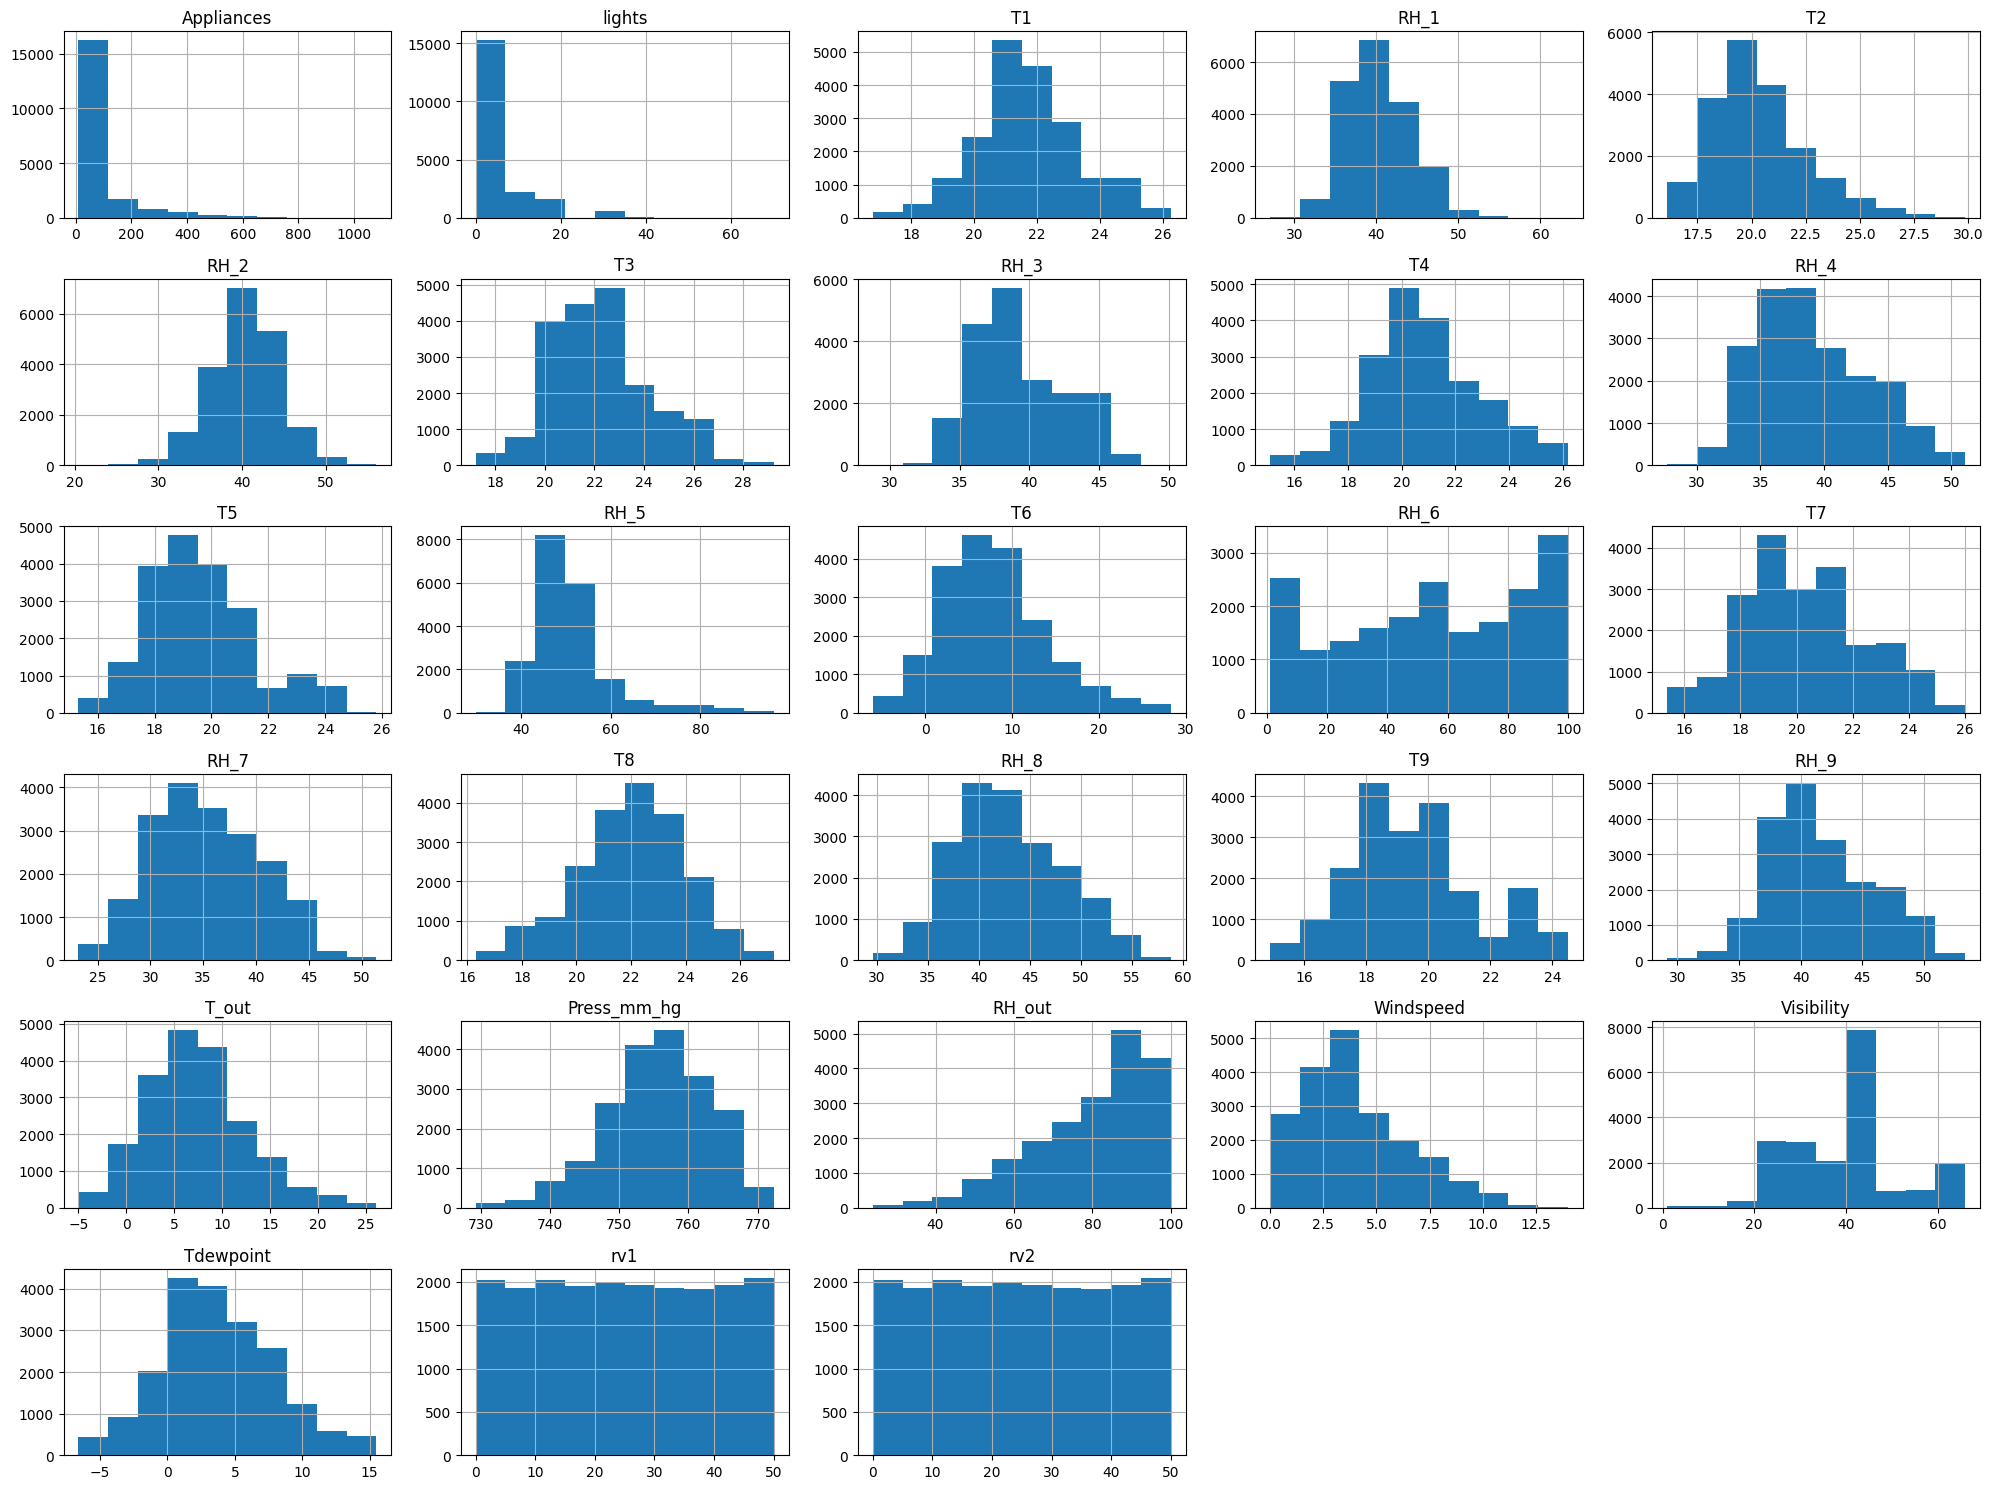

In [5]:
# Prikaz histograma za sve numeričke varijable radi vizualne inspekcije distribucije
appliancesData.hist(figsize=(20, 15))
plt.tight_layout()
plt.show()

Provjera numeričkih varijabli na osnovu broja jedinstvenih vrijednosti, što može ukazivati na uniformne ili nelogične distribucije

In [6]:
threshold = 0.01  # prag udjela jedinstvenih vrijednosti
for col in appliancesData.select_dtypes(include=['float64', 'int64']).columns:
    unique_count = appliancesData[col].nunique()
    total_count = len(appliancesData[col])
    if unique_count / total_count < threshold:
        print(f"Varijabla {col} ima neobično malo jedinstvenih vrijednosti: {unique_count} jedinstvenih vrijednosti od {total_count} zapisa.")

Varijabla Appliances ima neobično malo jedinstvenih vrijednosti: 92 jedinstvenih vrijednosti od 19735 zapisa.
Varijabla lights ima neobično malo jedinstvenih vrijednosti: 8 jedinstvenih vrijednosti od 19735 zapisa.
Varijabla Windspeed ima neobično malo jedinstvenih vrijednosti: 189 jedinstvenih vrijednosti od 19735 zapisa.


Neke varijable imaju mali broj jedinstvenih vrijednosti, ali uzimajući u obzir kontekst i smisao podataka, možemo zaključiti da su te vrijednosti opravdane i da je s njima sve u redu

Ispis deskriptivnih statistika za dodatnu analizu distribucija

In [7]:
display(appliancesData.describe())

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


Provjera, redizajn i određivanje ciljne varijable i njene kvalitete

Za ciljnu varijablu odabrana je varijabla "Appliances" koja ukazuje na potrošnju energije uređaja. Odabrana je zato što većina drugih varijabli poput temperature, vlažnosti, vanjskih faktora i svjetla može utjecati na nju te ju to čini zanimljivom varijablom za proučavanje.

Ciljna varijabla: Appliances
Appliances - potrošnja energije u Wh
Deskriptivne statistike za Appliances:
count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64


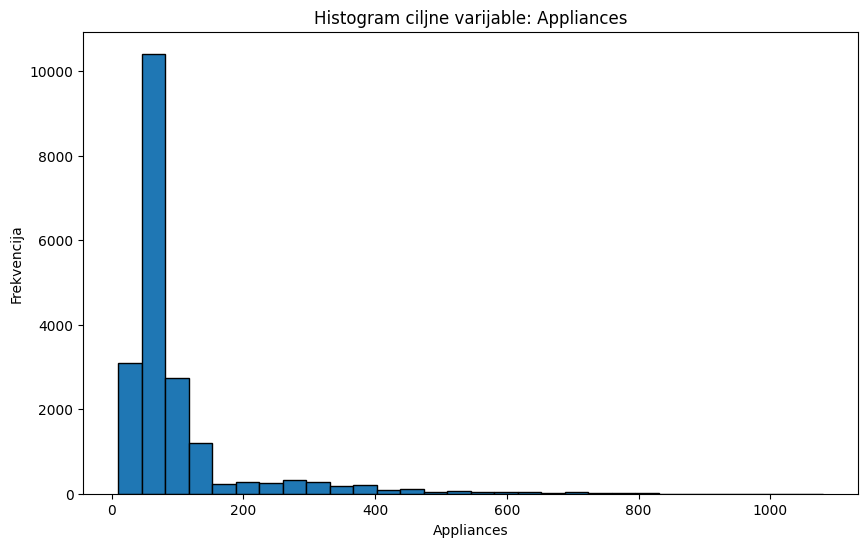

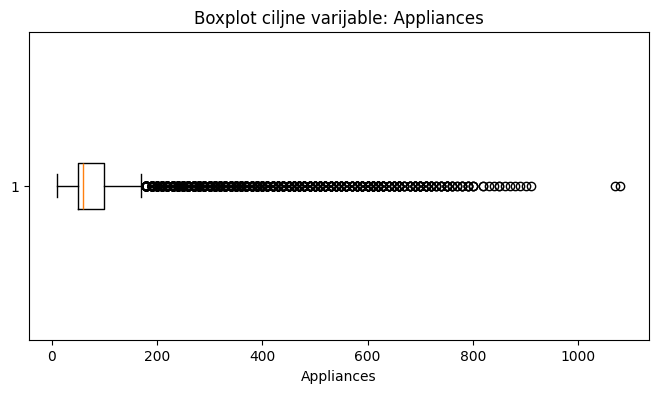

In [8]:
# Postavljanje ciljne varijable
target_col = "Appliances"
print("Ciljna varijabla:", target_col)
print("Appliances - potrošnja energije u Wh")

# Ispis deskriptivnih statistika ciljne varijable
print(f"Deskriptivne statistike za {target_col}:")
print(appliancesData[target_col].describe())

# Prikaz raspodjele vrijednosti ciljne varijable u histogramu
plt.figure(figsize=(10, 6))
plt.hist(appliancesData[target_col], bins=30, edgecolor='black')
plt.title("Histogram ciljne varijable: " + target_col)
plt.xlabel(target_col)
plt.ylabel("Frekvencija")
plt.show()

# Prikaz raspodijele vrijednosti u boxplotu radi bolje inspekcije outliera
plt.figure(figsize=(8,4))
plt.boxplot(appliancesData[target_col].dropna(), vert=False)
plt.title("Boxplot ciljne varijable: " + target_col)
plt.xlabel(target_col)
plt.show()


Analiza ciljne varijable

Korelacijski koeficijenti sa varijablom Appliances:
 Appliances     1.000000
lights         0.197278
T2             0.120073
T6             0.117638
T_out          0.099155
Windspeed      0.087122
RH_1           0.086031
T3             0.085060
T1             0.055447
T4             0.040281
T8             0.039572
RH_3           0.036292
T7             0.025801
T5             0.019760
RH_4           0.016965
Tdewpoint      0.015353
T9             0.010010
RH_5           0.006955
Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


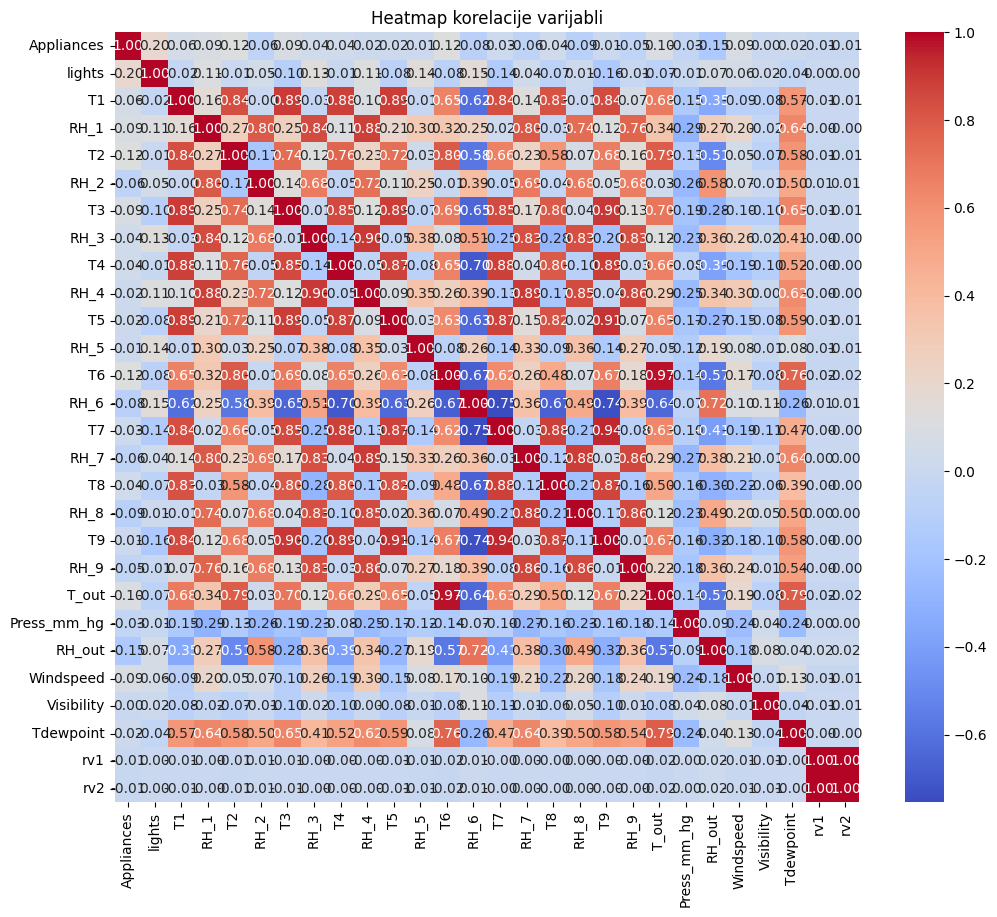

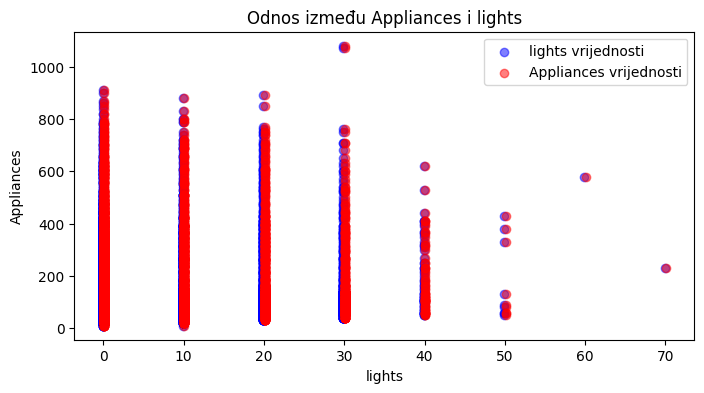

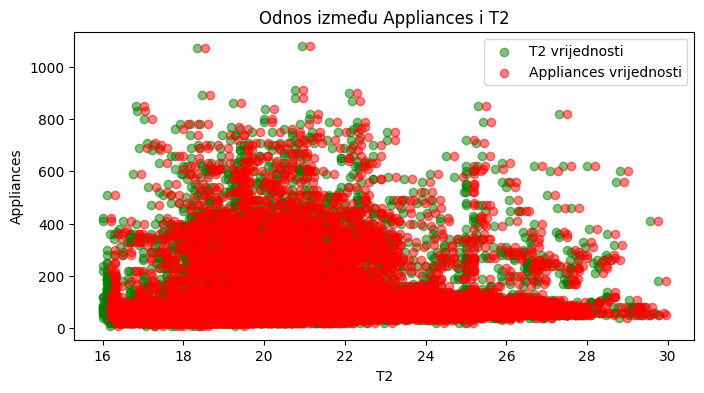

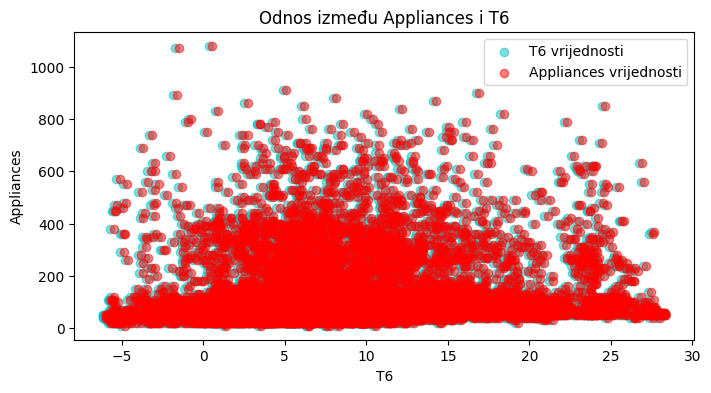

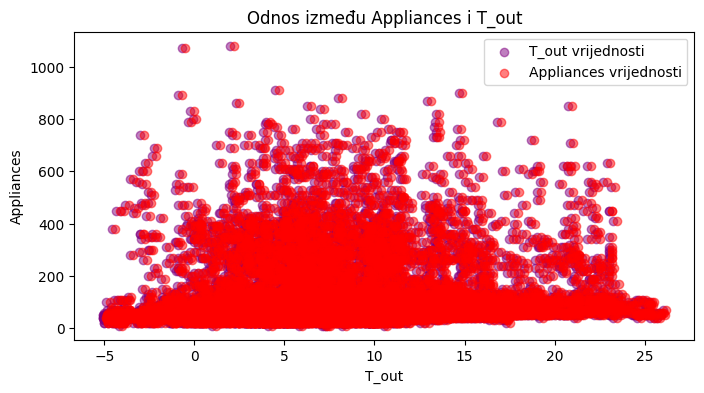

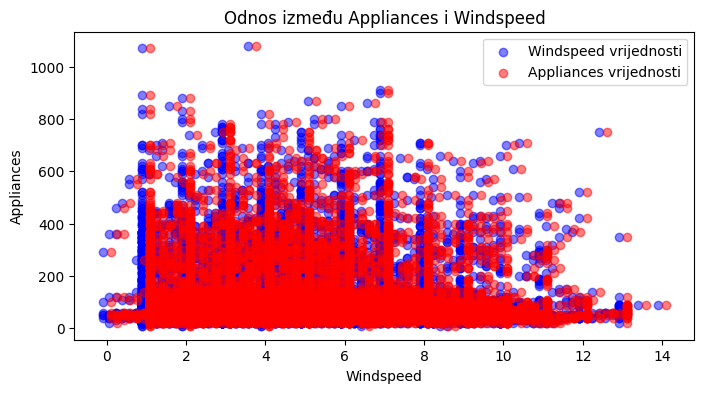

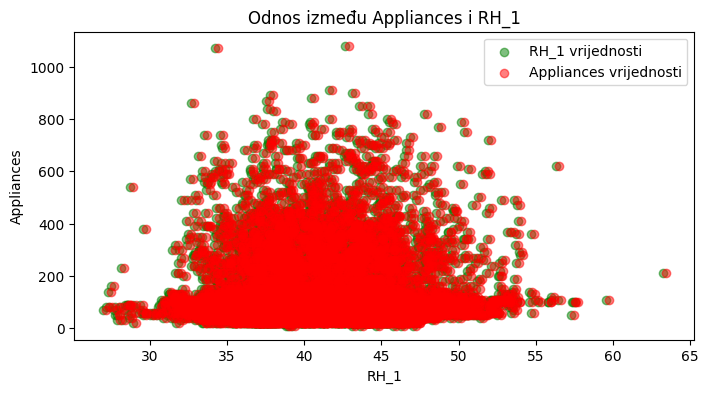

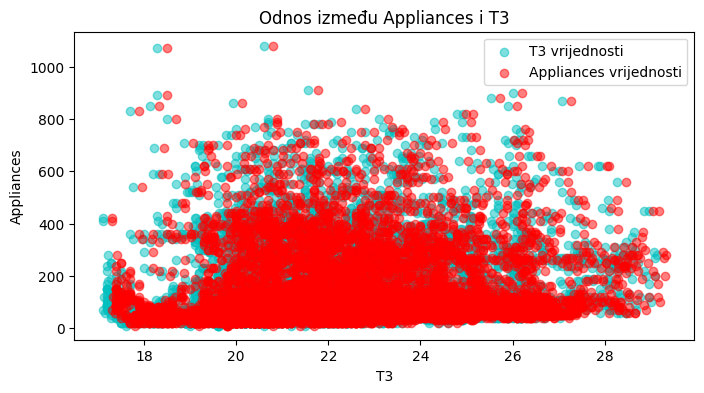

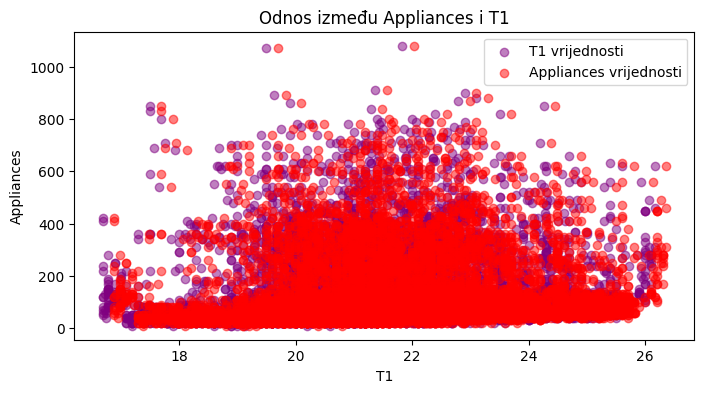

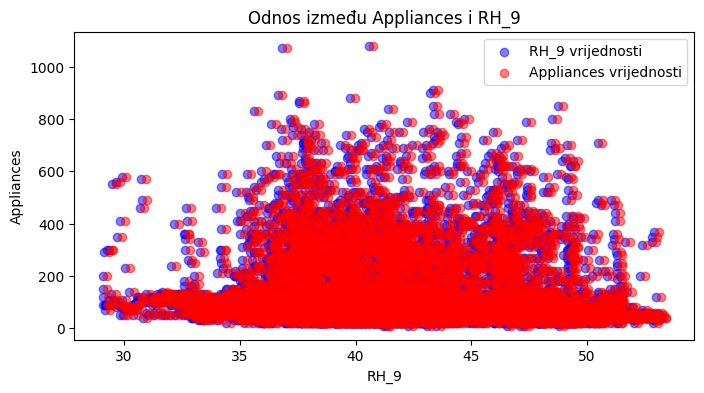

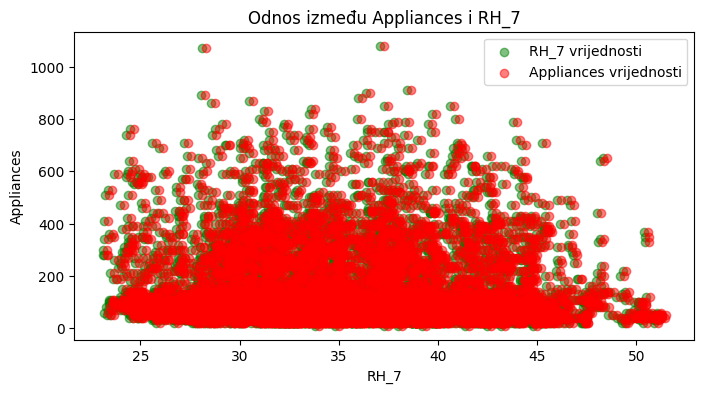

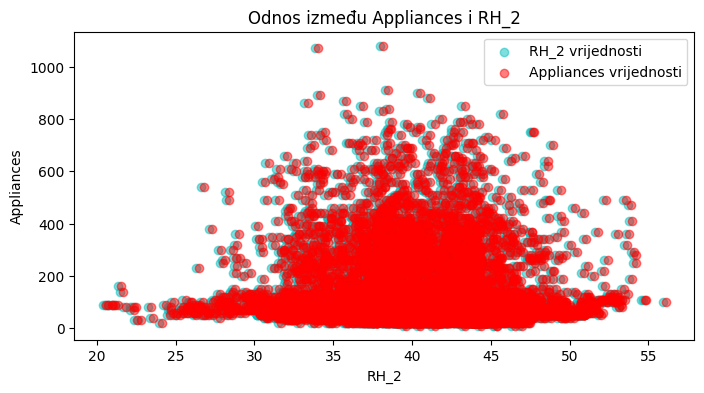

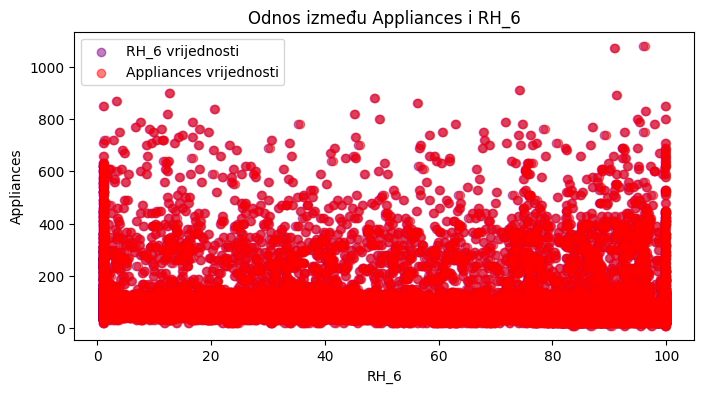

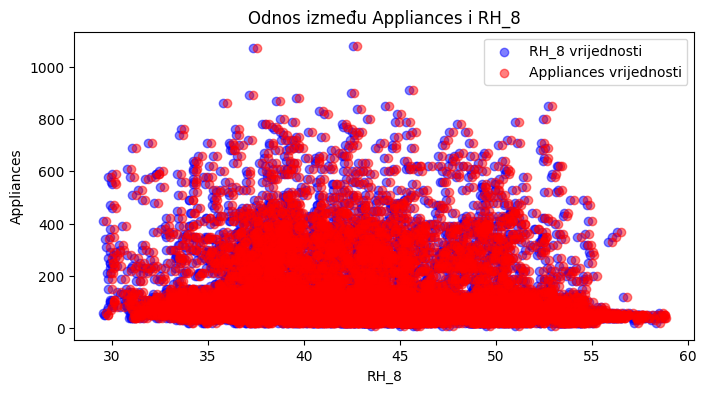

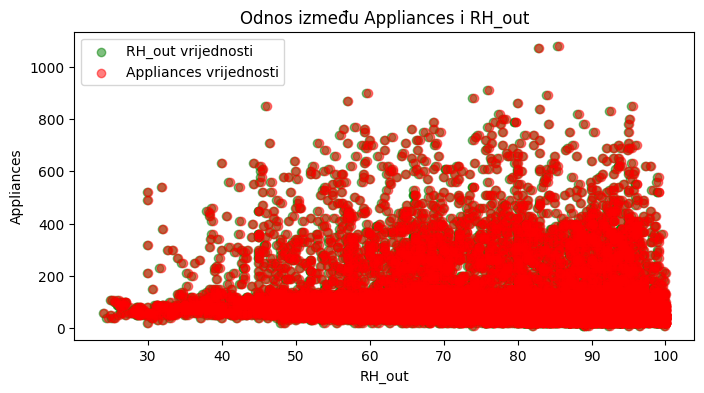

In [9]:
# Korelacijska analiza između ciljne varijable (Appliances) i ostalih varijabli
corr_matrix = appliancesData.select_dtypes(include=['number']).corr()
corr_target = corr_matrix[target_col].sort_values(ascending=False)
print("Korelacijski koeficijenti sa varijablom Appliances:\n", corr_target)

# Vizualizacija korelacije heatmapom
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap korelacije varijabli")
plt.show()

# Definicicija jake korelacije i izbacivanje same ciljne varijable
strong_corr = corr_target.drop(target_col)
strong_corr = strong_corr[strong_corr.abs() > 0.05]

# Scatter plotovi za varijable sa jakom korelacijom s ciljnim varijablom
colors = ['b', 'g', 'c', 'purple']
for i, col in enumerate(strong_corr.index):
    plt.figure(figsize=(8, 4))
    color = colors[i % len(colors)]
    # Pomak za vizualizaciju: x-koordinate se malo razdvoje
    plt.scatter(appliancesData[col] - 0.1, appliancesData[target_col], 
                color=color, alpha=0.5, label=f"{col} vrijednosti")
    plt.scatter(appliancesData[col] + 0.1, appliancesData[target_col], 
                color='r', alpha=0.5, label=f"{target_col} vrijednosti")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f"Odnos između {target_col} i {col}")
    plt.legend()
    plt.show()

U nastavku je kratak zaključak:

- Varijabla "lights" ima najveću pozitivnu korelaciju s "Appliances" (≈0.20), 
što sugerira da povećana razina osvjetljenja može biti povezana s povećanom potrošnjom energije.  
- Sljedeće važne varijable su "T2" i "T6" (≈0.12), 
što ukazuje na značajan utjecaj temperature u određenim zonama na ciljnu varijablu.  
- Vanjska temperatura ("T_out") i brzina vjetra ("Windspeed") također 
pokazuju primjetne korelacijske koeficijente (≈0.10 i ≈0.09), 
što implicira da vremenski uvjeti igraju ulogu u varijacijama potrošnje.  
- Ostale varijable pokazuju slabije, ali i dalje mjerne veze s potrošnjom energije.

Ukupno, iako su korelacijski koeficijenti relativno niski, rezultati sugeriraju da su svjetla, 
temperature (posebno T2 i T6) te klimatski uvjeti među značajnijim faktorima 
u utjecaju na potrošnju električne energije.

Statističke analize uzorka podataka

Prikaz distribucija frekvencije kategoričkih varijabla u ovom data setu nije potreban jer je jedina kategorička varijabla "date" koja je u svakom zapisu drugačija jer su se podaci zaokruživali na svakih 10 minuta (2016-01-11 17:00:00, 2016-01-11 17:10:00...)
Ispod je priložen kod kojim bi se to napravilo kada bi bilo potrebno.

In [10]:
""" categorical_variables = ['date']

#Ovaj kod generira histogram za svaku kategoričku varijablu u skupu podataka.
for var in categorical_variables:
    fig, ax = plt.subplots(figsize=(20, 5))
    sns.histplot(data=appliancesData, x=var, kde=True, ax=ax)
    ax.set_title(f"{var} Histogram")
    ax.set_xlabel(var)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=90)
    plt.show() """;

Izračun srednje vrijednosti, z vrijednosti, zaobljenosti distribucije i nagnutosti distribucije za kontinuirane varijable

In [11]:
# Odabir kontinuiranih varijabli (numeričkih kolona)
continuous_vars = appliancesData.select_dtypes(include=['int64', 'float64']).columns

# Izračun srednjih vrijednosti
mean_values = appliancesData[continuous_vars].mean()

# Izračun z-vrijednosti (standardizacija)
z_values = appliancesData[continuous_vars].apply(zscore)

# Izračun nagnutosti (skewness) i zaobljenosti (kurtosis)
skewness = appliancesData[continuous_vars].skew()
kurtosis = appliancesData[continuous_vars].kurtosis()

# Kreiranje tablice sa deskriptivnim statistikama za numeričke varijable
stats_table = pd.DataFrame({
    'Mean': mean_values,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

print("Deskriptivne statistike za kontinuirane varijable:")
display(stats_table)

print("\nPrvih 5 redova z-vrijednosti:")
display(z_values.head())

Deskriptivne statistike za kontinuirane varijable:


,Mean,Skewness,Kurtosis
Appliances,97.694958,3.386367,13.667863
lights,3.801875,2.195155,4.462147
T1,21.686571,0.120917,0.161601
RH_1,40.259739,0.465774,0.112629
T2,20.341219,0.889658,0.933397
RH_2,40.420420,-0.268247,0.670959
T3,22.267611,0.450777,-0.007055
RH_3,39.242500,0.467589,-0.583126
T4,20.855335,0.170384,-0.037633
RH_4,39.026904,0.444614,-0.613967



Prvih 5 redova z-vrijednosti:


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,-1.217324,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,-1.200778,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135,-0.440240,-0.440240
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,-1.233869,0.950910,-0.196529,-2.949298,0.82208,0.935713,1.441572,0.319294,0.252109,0.252109
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,-1.233869,0.926821,-0.218470,-2.935783,0.82208,0.799723,1.116559,0.295454,1.408801,1.408801
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,-1.233869,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.791547,0.271613,-1.028122,-1.028122


Izračun korelacije svake varijable sa ciljnom varijablom
(Već odrađeno pri analizi ciljne varijable, ali zakomentirani kod se također može naći ispod)

In [ ]:
""" # Korelacijska analiza između ciljne varijable (Appliances) i ostalih varijabli
corr_matrix = appliancesData.select_dtypes(include=['number']).corr()
corr_target = corr_matrix[target_col].sort_values(ascending=False)
print("Korelacijski koeficijenti sa varijablom Appliances:\n", corr_target)

# Vizualizacija korelacijskog matricom kroz heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap korelacije varijabli")
plt.show()

# Definicicija jake korelacije i izbacivanje same ciljne varijable
strong_corr = corr_target.drop(target_col)
strong_corr = strong_corr[strong_corr.abs() > 0.05]

# Scatter plotovi za varijable sa jakom korelacijom s ciljnim varijablom
colors = ['b', 'g', 'c', 'purple']
for i, col in enumerate(strong_corr.index):
    plt.figure(figsize=(8, 4))
    color = colors[i % len(colors)]
    # Pomak za vizualizaciju: x-koordinate se malo razdvoje
    plt.scatter(appliancesData[col] - 0.1, appliancesData[target_col], 
                color=color, alpha=0.5, label=f"{col} vrijednosti")
    plt.scatter(appliancesData[col] + 0.1, appliancesData[target_col], 
                color='r', alpha=0.5, label=f"{target_col} vrijednosti")
    plt.xlabel(col)
    plt.ylabel(target_col)
    plt.title(f"Odnos između {target_col} i {col}")
    plt.legend()
    plt.show() """

Izračun korelacije svake varijable izražene kroz Z vrijednost i  kategorizirane u razrede <-3 , (-3 do 3),>3 s ciljnom varijablom

In [13]:
def categorize_z(val):
    if val < -3:
        return -1
    elif val > 3:
        return 1
    else:
        return 0

# Izračun kategoriziranih Z-vrijednosti i korelacije s ciljnom varijablom (Appliances)
z_stats = {}
for col in continuous_vars:
    # Preskočimo ciljnu varijablu ako nije potrebna
    if col == target_col:
        continue
    z_vals = zscore(appliancesData[col])
    categories = pd.Series(z_vals).apply(categorize_z)
    # Korelacija između originalne vrijednosti ciljne varijable i kategoriziranih vrijednosti varijable
    if categories.nunique() > 1:
        corr_value = appliancesData[target_col].corr(categories)
    else:
        corr_value = 0
    z_stats[col] = {
        'Ekstremno niske (<-3)': (categories == -1).sum(),
        'Normalne (-3 do 3)': (categories == 0).sum(),
        'Ekstremno visoke (>3)': (categories == 1).sum(),
        'Korelacija': corr_value
    }

results_df = pd.DataFrame(z_stats).T
print("\nDetaljna analiza kategoriziranih Z-vrijednosti i njihovih korelacija s Appliances:")
display(results_df.sort_values('Korelacija', ascending=False))


Detaljna analiza kategoriziranih Z-vrijednosti i njihovih korelacija s Appliances:


,Ekstremno niske (<-3),Normalne (-3 do 3),Ekstremno visoke (>3),Korelacija
lights,0.0,19088.0,647.0,0.103310
T3,0.0,19681.0,54.0,0.064948
RH_5,0.0,19168.0,567.0,0.044697
T5,0.0,19712.0,23.0,0.044516
T2,0.0,19529.0,206.0,0.037372
RH_1,13.0,19626.0,96.0,0.033914
RH_3,4.0,19721.0,10.0,0.025124
Visibility,37.0,19698.0,0.0,0.020505
RH_2,100.0,19604.0,31.0,0.019193
RH_out,159.0,19576.0,0.0,0.005216


Zaključci temeljem provedenih analiza

Kvaliteta podataka
- Dataset ne sadrži nedostajuće vrijednosti
- Sve varijable imaju odgovarajuće tipove podataka (numeričke i jedna vremenska)
- Nema potrebe za čišćenjem ili transformacijom podataka

Distribucije podataka
- Većina varijabli pokazuje normalnu ili približno normalnu distribuciju
- Ciljna varijabla (Appliances) pokazuje desnostranu asimetriju (skewness=3.39) i izraženu zaobljenost (kurtosis=13.67)

Korelacije
- Najjače korelacije s ciljnom varijablom (Appliances) pokazuju:
    - lights (0.20) - pozitivna korelacija
    - RH_out (-0.15) - negativna korelacija
    - T2 (0.12) - pozitivna korelacija
    - T6 (0.12) - pozitivna korelacija 
    - T_out (0.10) - pozitivna korelacija
    

Z-vrijednosti
- Većina podataka nalazi se unutar 3 standardne devijacije
- Određeni broj ekstremnih vrijednosti prisutan je kod:
    - lights (647 visokih vrijednosti)
    - RH_5 (567 visokih vrijednosti)
    - T2 (206 visokih vrijednosti)
    - RH_out (159 niskih vrijednosti)

Sveukupni zaključci
- Potrošnja energije najviše ovisi o rasvjeti i temperaturi
- Vanjski uvjeti (temperatura, vlažnost) imaju umjeren utjecaj
- Postoji značajan broj ekstremnih vrijednosti koje bi mogle utjecati na modeliranje
- Korelacije su generalno slabe do umjerene, što sugerira kompleksnu međuovisnost varijabli

IV, WoE izračuni

Izračunavanje i prikazivanje IV i WoE za svaku varijablu

In [14]:
# Korak 1: Diskretizacija varijable 'date' u 4 kategorije
# Stvaranje kopije originalnog skupa podataka kako bismo radili na njoj bez mijenjanja originala.
AppliancesData_Discretized = appliancesData.copy()

# Provjeravanje je li stupac 'date' u formatu datetime. 
# Ako nije, pretvaramo ga u datetime format kako bismo mogli izdvojiti sate.
if not pd.api.types.is_datetime64_any_dtype(AppliancesData_Discretized['date']):
    AppliancesData_Discretized['date'] = pd.to_datetime(AppliancesData_Discretized['date'])

# Definiranje funkcije za kategorizaciju sati u 4 kategorije: jutro (6-12), poslijepodne (12-18), večer (18-24), noć (0-6).
# Funkcija prima sat (broj) i vraća odgovarajuću kategoriju temeljem definiranih intervala.
def discretize_date(hour):
    if 6 <= hour < 12:
        return 'morning'  # Jutro: od 6:00 do 11:59
    elif 12 <= hour < 18:
        return 'afternoon'  # Poslijepodne: od 12:00 do 17:59
    elif 18 <= hour < 24:
        return 'evening'  # Večer: od 18:00 do 23:59
    else:
        return 'night'  # Noć: od 0:00 do 5:59

# Primjenjivanje diskretizacije na stupac 'date' tako da izdvojimo sat (dt.hour) i funkcijom ga pretovorimo u kategoriju.
# Spremanje rezultata u novi stupac 'Part_of_day' (umjesto 'date_discretized' za intuitivniji naziv).
AppliancesData_Discretized['Part_of_day'] = AppliancesData_Discretized['date'].dt.hour.apply(discretize_date)

# Uklanjanje originalnog stupca 'date' iz DataFrame-a kako bi ostala samo diskretizirana verzija ('Part_of_day').
# Ovo osigurava da CSV datoteka neće sadržavati datetime vrijednosti.
# Korisno zbog trećeg zadatka izrade bayesove mreže
AppliancesData_Discretized = AppliancesData_Discretized.drop(columns=['date'])

# Korak 2: Diskretiziranje svih kontinuiranih varijabli u 5 kategorija s prilagođenim oznakama
# Lista ne uključuje 'date' (koji je već uklonjen) niti 'target_bin' (koji se kasnije stvara).
for col in continuous_vars:
    try:
        # Koristimo pd.qcut za podjelu kontinuirane varijable u 5 kvantila (podjednake frekvencije).
        # Funkcija vraća granice intervala (bins_array) koje koristimo za definiranje oznaka.
        _, bins_array = pd.qcut(AppliancesData_Discretized[col], q=5, retbins=True, duplicates='drop')
        n_bins = len(bins_array) - 1  # Broj intervala može biti manji od 5 ako postoje duplicirane vrijednosti.
        labels = []  # Lista za spremanje prilagođenih oznaka intervala.
        for i in range(n_bins):
            if i == 0:
                # Prvi interval: oznaka je oblika 's1_below_{gornja_granica}' (npr. 's1_below_10.50').
                label = f"s1_below_{bins_array[i+1]:.2f}"
            elif i == n_bins - 1:
                # Posljednji interval: oznaka je oblika 's{n}_{donja_granica}_up' (npr. 's5_50.00_up').
                label = f"s{n_bins}_{bins_array[i]:.2f}_up"
            else:
                # Srednji intervali: oznaka je oblika 's{broj}_{donja_granica}_{gornja_granica}' (npr. 's2_10.50_20.75').
                label = f"s{i+1}_{bins_array[i]:.2f}_{bins_array[i+1]:.2f}"
            labels.append(label)
        # Dodjeljujemo prilagođene oznake diskretiziranim vrijednostima u stupcu.
        AppliancesData_Discretized[col] = pd.qcut(AppliancesData_Discretized[col], q=5, labels=labels, duplicates='drop')
    except Exception as e:
        print(f"Diskretizacija nije uspjela za stupac {col}: {e}")

# Korak 3: Izvoz diskretiziranog skupa podataka u CSV datoteku
# Spremamo DataFrame s diskretiziranim vrijednostima u CSV datoteku 'AppliancesData_Discretized.csv'.
# Parametar index=False osigurava da se indeks ne zapisuje u datoteku.
# Potrebno zbog sljedećeg zadatka (GeNIe)
AppliancesData_Discretized.to_csv("AppliancesData_Discretized.csv", index=False)

# Korak 4: Izračun WoE i IV za svaku varijablu koristeći stvorene kategorije
# Stvaranje binarne ciljne varijable 'target_bin' na temelju medijana ciljanog stupca (npr. 'Appliances') iz originalnog skupa.
# Vrijednosti iznad medijana označavamo s 1 (loše), ispod ili jednake s 0 (dobro).
median_value = appliancesData[target_col].median()
AppliancesData_Discretized['target_bin'] = (appliancesData[target_col] > median_value).astype(int)
# Definiranje funkcije za izračun Weight of Evidence (WoE) i Information Value (IV) za svaku varijablu.
def calc_woe_iv(df, feature, target, epsilon=0.0001):
    # Provjeravanje je li varijabla kategorička kako bismo koristili postojeće intervale.
    # Koristenje isinstance za provjeru tipa podataka i izbjegavamo deprecirane metode.
    if isinstance(df[feature].dtype, pd.CategoricalDtype) or df[feature].dtype == 'object':
        binned = df[feature]  # Koristenje već diskretizirane vrijednosti.
    else:
        print(f"Varijabla {feature} nije kategorička u DataFrame-u. Preskačemo je.")
        return None, None

    # Izračunavanje ukupnog broja "dobrih" (0) i "loših" (1) događaja u ciljnoj varijabli.
    total_good = (df[target] == 0).sum()
    total_bad = (df[target] == 1).sum()
    
    # Grupiranje podataka po kategorijama i brojanje dobrih i loših događaja za svaku kategoriju.
    grouped = df.groupby(binned, observed=True)[target].agg([
        ('good', lambda x: (x == 0).sum()),  # Broj "dobrih" događaja.
        ('bad', lambda x: (x == 1).sum())   # Broj "loših" događaja.
    ])
    
    # Izračunavanje postotka dobrih i loših događaja s malim epsilon dodatkom kako bismo izbjegli dijeljenje s nulom.
    grouped['good_perc'] = (grouped['good'] + epsilon) / (total_good + epsilon * grouped.shape[0])
    grouped['bad_perc'] = (grouped['bad'] + epsilon) / (total_bad + epsilon * grouped.shape[0])
    
    # Izračunavanje WoE (logaritamski omjer dobrih i loših postotaka) i IV (doprinos informacijske vrijednosti).
    grouped['WoE'] = np.log(grouped['good_perc'] / grouped['bad_perc'])
    grouped['IV'] = (grouped['good_perc'] - grouped['bad_perc']) * grouped['WoE']
    iv = grouped['IV'].sum()  # Ukupna informacijska vrijednost za varijablu.
    
    return grouped.reset_index(), iv

# Definiranje liste prediktora: uključivanje svih diskretiziranih varijabli osim ciljne i 'target_bin'.
predictors = [col for col in AppliancesData_Discretized.columns if col not in [target_col, 'target_bin']]

# Stvaranje rječnike za pohranu rezultata WoE tablica i IV vrijednosti.
iv_dict = {}
woe_dict = {}

# Izračunavanje WoE i IV za svaki prediktor u listi.
for feature in predictors:
    woe_table, iv = calc_woe_iv(AppliancesData_Discretized, feature, 'target_bin')
    if woe_table is None:
        continue  # Preskakanje ako izračun nije uspio.
    iv_dict[feature] = iv  # Spremanje IV vrijednosti za varijablu.
    woe_dict[feature] = woe_table  # Spremanje WoE tablice za varijablu.
    print(f"Varijabla: {feature}")
    print(f"IV: {iv:.6f}")
    print("WoE tablica:")
    display(woe_table)  # Ispisivanje tablice
    print("-" * 50)

print("Ukupni IV za sve varijable:")
display(iv_dict)  # Ispisivanje rječnika s IV vrijednostima

Varijabla: lights
IV: 0.230357
WoE tablica:


,lights,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_10.00,10227,7237,0.95188,0.804916,0.167701,0.024646
1,s2_10.00_up,517,1754,0.04812,0.195084,-1.399735,0.205711


--------------------------------------------------
Varijabla: T1
IV: 0.143656
WoE tablica:


,T1,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_20.50,2792,1343,0.259866,0.149372,0.553729,0.061184
1,s2_20.50_21.26,2260,1502,0.210350,0.167056,0.230444,0.009977
2,s3_21.26_22.00,2402,1905,0.223567,0.211879,0.053696,0.000628
3,s4_22.00_22.89,1595,2122,0.148455,0.236014,-0.463609,0.040593
4,s5_22.89_up,1695,2119,0.157762,0.235680,-0.401385,0.031275


--------------------------------------------------
Varijabla: RH_1
IV: 0.017358
WoE tablica:


,RH_1,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_36.90,2192,1879,0.204021,0.208987,-0.024049,0.000119
1,s2_36.90_38.79,2307,1624,0.214724,0.180625,0.172932,0.005897
2,s3_38.79_40.90,2247,1646,0.209140,0.183072,0.133125,0.003470
3,s4_40.90_43.76,2009,1884,0.186988,0.209543,-0.113883,0.002569
4,s5_43.76_up,1989,1958,0.185127,0.217773,-0.162415,0.005302


--------------------------------------------------
Varijabla: T2
IV: 0.294892
WoE tablica:


,T2,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_18.53,2958,1033,0.275316,0.114893,0.873923,0.140198
1,s2_18.53_19.50,2573,1377,0.239483,0.153153,0.447042,0.038593
2,s3_19.50_20.50,1985,2037,0.184754,0.226560,-0.203983,0.008528
3,s4_20.50_21.96,1642,2199,0.152829,0.244578,-0.470211,0.043141
4,s5_21.96_up,1586,2345,0.147617,0.260816,-0.569194,0.064432


--------------------------------------------------
Varijabla: RH_2
IV: 0.072246
WoE tablica:


,RH_2,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_37.26,1723,2229,0.160369,0.247915,-0.435609,0.038136
1,s2_37.26_39.59,2074,1935,0.193038,0.215215,-0.108752,0.002412
2,s3_39.59_41.50,2254,1726,0.209792,0.191970,0.088776,0.001582
3,s4_41.50_43.90,2226,1698,0.207185,0.188856,0.092632,0.001698
4,s5_43.90_up,2467,1403,0.229617,0.156045,0.386267,0.028418


--------------------------------------------------
Varijabla: T3
IV: 0.093393
WoE tablica:


,T3,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_20.50,2747,1335,0.255678,0.148482,0.543455,0.058256
1,s2_20.50_21.63,2071,1751,0.192759,0.194750,-0.010279,0.000020
2,s3_21.63_22.53,2211,1753,0.205789,0.194973,0.053993,0.000584
3,s4_22.53_23.95,1899,2021,0.176750,0.224780,-0.240388,0.011546
4,s5_23.95_up,1816,2131,0.169025,0.237015,-0.338078,0.022986


--------------------------------------------------
Varijabla: RH_3
IV: 0.036627
WoE tablica:


,RH_3,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_36.47,1804,2161,0.167908,0.240351,-0.358688,0.025985
1,s2_36.47_37.90,2401,1664,0.223474,0.185074,0.188538,0.007240
2,s3_37.90_39.40,2096,1733,0.195086,0.192748,0.012053,0.000028
3,s4_39.40_42.53,2178,1762,0.202718,0.195974,0.033834,0.000228
4,s5_42.53_up,2265,1671,0.210815,0.185853,0.126029,0.003146


--------------------------------------------------
Varijabla: T4
IV: 0.095746
WoE tablica:


,T4,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_19.20,2656,1353,0.247208,0.150484,0.496373,0.048011
1,s2_19.20_20.20,2356,1587,0.219285,0.176510,0.216996,0.009282
2,s3_20.20_21.17,2025,1896,0.188477,0.210878,-0.112300,0.002516
3,s4_21.17_22.60,1799,2152,0.167442,0.239350,-0.357290,0.025692
4,s5_22.60_up,1908,2003,0.177587,0.222778,-0.226714,0.010245


--------------------------------------------------
Varijabla: RH_4
IV: 0.045381
WoE tablica:


,RH_4,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_35.00,1975,1986,0.183824,0.220888,-0.183678,0.006808
1,s2_35.00_37.29,2275,1716,0.211746,0.190858,0.103861,0.002170
2,s3_37.29_39.50,2339,1568,0.217703,0.174397,0.221799,0.009605
3,s4_39.50_43.26,1832,2104,0.170514,0.234012,-0.316555,0.020101
4,s5_43.26_up,2323,1617,0.216214,0.179847,0.184163,0.006698


--------------------------------------------------
Varijabla: T5
IV: 0.066262
WoE tablica:


,T5,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_18.00,2426,1583,0.225800,0.176065,0.248799,0.012374
1,s2_18.00_18.89,2243,1651,0.208768,0.183628,0.128310,0.003226
2,s3_18.89_19.89,2463,1623,0.229244,0.180514,0.238980,0.011646
3,s4_19.89_20.89,1869,2081,0.173958,0.231454,-0.285568,0.016419
4,s5_20.89_up,1743,2053,0.162230,0.228339,-0.341818,0.022597


--------------------------------------------------
Varijabla: RH_5
IV: 0.018015
WoE tablica:


,RH_5,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_44.63,1940,2015,0.180566,0.224113,-0.216055,0.009409
1,s2_44.63_47.50,2189,1773,0.203742,0.197197,0.032648,0.000214
2,s3_47.50_50.79,2183,1792,0.203183,0.199310,0.019244,0.000075
3,s4_50.79_55.00,2328,1590,0.216679,0.176844,0.203152,0.008093
4,s5_55.00_up,2104,1821,0.195830,0.202536,-0.033669,0.000226


--------------------------------------------------
Varijabla: T6
IV: 0.189002
WoE tablica:


,T6,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_2.77,2811,1138,0.261634,0.126571,0.726145,0.098076
1,s2_2.77_5.90,2221,1740,0.206720,0.193527,0.065949,0.000870
2,s3_5.90_8.89,2141,1823,0.199274,0.202758,-0.017334,0.000060
3,s4_8.89_12.42,2074,1840,0.193038,0.204649,-0.058410,0.000678
4,s5_12.42_up,1497,2450,0.139334,0.272495,-0.670748,0.089318


--------------------------------------------------
Varijabla: RH_6
IV: 0.230494
WoE tablica:


,RH_6,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_22.82,1334,2613,0.124162,0.290624,-0.850440,0.141566
1,s2_22.82_48.17,1972,1976,0.183544,0.219775,-0.180150,0.006527
2,s3_48.17_66.79,2650,1296,0.246649,0.144144,0.537154,0.055061
3,s4_66.79_87.59,2458,1489,0.228779,0.165610,0.323120,0.020411
4,s5_87.59_up,2330,1617,0.216865,0.179847,0.187172,0.006929


--------------------------------------------------
Varijabla: T7
IV: 0.062786
WoE tablica:


,T7,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_18.50,2735,1497,0.254561,0.166500,0.424545,3.738579e-02
1,s2_18.50_19.41,1996,1667,0.185778,0.185408,0.001996,7.395463e-07
2,s3_19.41_20.73,2196,1750,0.204393,0.194639,0.048898,4.769577e-04
3,s4_20.73_22.00,1960,1994,0.182427,0.221777,-0.195322,7.685890e-03
4,s5_22.00_up,1857,2083,0.172841,0.231676,-0.292970,1.723704e-02


--------------------------------------------------
Varijabla: RH_7
IV: 0.074989
WoE tablica:


,RH_7,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_30.76,1652,2299,0.153760,0.255700,-0.508611,5.184775e-02
1,s2_30.76_33.66,2147,1796,0.199832,0.199755,0.000386,2.979422e-08
2,s3_33.66_36.52,2256,1691,0.209978,0.188077,0.110150,2.412359e-03
3,s4_36.52_40.20,2245,1706,0.208954,0.189745,0.096431,1.852292e-03
4,s5_40.20_up,2444,1499,0.227476,0.166722,0.310714,1.887699e-02


--------------------------------------------------
Varijabla: T8
IV: 0.116378
WoE tablica:


,T8,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_20.43,2556,1413,0.237900,0.157157,0.414605,0.033476
1,s2_20.43_21.67,2470,1466,0.229896,0.163052,0.343557,0.022965
2,s3_21.67_22.60,2159,1790,0.200949,0.199088,0.009306,0.000017
3,s4_22.60_23.70,1942,2137,0.180752,0.237682,-0.273808,0.015588
4,s5_23.70_up,1617,2185,0.150503,0.243021,-0.479167,0.044332


--------------------------------------------------
Varijabla: RH_8
IV: 0.209035
WoE tablica:


,RH_8,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_38.33,1353,2595,0.125931,0.288622,-0.829386,0.134934
1,s2_38.33_41.03,2018,1937,0.187826,0.215438,-0.137157,0.003787
2,s3_41.03_43.75,2296,1642,0.213701,0.182627,0.157130,0.004883
3,s4_43.75_48.04,2539,1408,0.236318,0.156601,0.411477,0.032802
4,s5_48.04_up,2538,1409,0.236225,0.156712,0.410373,0.032630


--------------------------------------------------
Varijabla: T9
IV: 0.041136
WoE tablica:


,T9,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_17.79,2544,1477,0.236783,0.164275,0.365601,0.026509
1,s2_17.79_18.70,2189,1801,0.203742,0.200311,0.016979,0.000058
2,s3_18.70_19.79,2064,1826,0.192107,0.203092,-0.055605,0.000611
3,s4_19.79_20.82,2058,1848,0.191549,0.205539,-0.070493,0.000986
4,s5_20.82_up,1889,2039,0.175819,0.226782,-0.254535,0.012972


--------------------------------------------------
Varijabla: RH_9
IV: 0.157541
WoE tablica:


,RH_9,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_38.02,1428,2520,0.132911,0.280280,-0.746107,0.109953
1,s2_38.02_39.79,2163,1845,0.201322,0.205205,-0.019107,0.000074
2,s3_39.79_41.98,2354,1531,0.219099,0.170281,0.252071,0.012306
3,s4_41.98_45.47,2267,1689,0.211001,0.187855,0.116197,0.002690
4,s5_45.47_up,2532,1406,0.235666,0.156379,0.410137,0.032519


--------------------------------------------------
Varijabla: T_out
IV: 0.138532
WoE tablica:


,T_out,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_2.90,2728,1235,0.253909,0.137360,0.614374,0.071605
1,s2_2.90_5.63,2217,1716,0.206348,0.190858,0.078036,0.001209
2,s3_5.63_8.40,2093,1893,0.194806,0.210544,-0.077688,0.001223
3,s4_8.40_11.23,2113,1794,0.196668,0.199533,-0.014462,0.000041
4,s5_11.23_up,1593,2353,0.148269,0.261706,-0.568195,0.064455


--------------------------------------------------
Varijabla: Press_mm_hg
IV: 0.026535
WoE tablica:


,Press_mm_hg,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_749.63,1876,2078,0.174609,0.231120,-0.280387,0.015845
1,s2_749.63_754.00,2120,1850,0.197319,0.205761,-0.041893,0.000354
2,s3_754.00_757.45,2175,1748,0.202439,0.194417,0.040433,0.000324
3,s4_757.45_762.25,2220,1722,0.206627,0.191525,0.075897,0.001146
4,s5_762.25_up,2353,1593,0.219006,0.177177,0.211949,0.008866


--------------------------------------------------
Varijabla: RH_out
IV: 0.299596
WoE tablica:


,RH_out,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_66.67,1296,2658,0.120625,0.295629,-0.896415,0.156876
1,s2_66.67_79.33,1823,2140,0.169676,0.238016,-0.338446,0.023129
2,s3_79.33_87.50,2377,1567,0.221240,0.174285,0.238553,0.011201
3,s4_87.50_93.00,2642,1502,0.245905,0.167056,0.386615,0.030484
4,s5_93.00_up,2606,1124,0.242554,0.125014,0.662799,0.077905


--------------------------------------------------
Varijabla: Windspeed
IV: 0.102662
WoE tablica:


,Windspeed,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_2.00,3673,1921,0.341865,0.213658,0.470039,0.060262
1,s2_2.00_3.00,1855,1433,0.172655,0.159382,0.079991,0.001062
2,s3_3.00_4.00,1502,1544,0.139799,0.171727,-0.205702,0.006568
3,s4_4.00_6.00,1924,2339,0.179077,0.260149,-0.373440,0.030276
4,s5_6.00_up,1790,1754,0.166605,0.195084,-0.157807,0.004494


--------------------------------------------------
Varijabla: Visibility
IV: 0.115285
WoE tablica:


,Visibility,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_27.67,2492,1505,0.231943,0.167390,0.326169,0.021055
1,s2_27.67_37.83,2028,1922,0.188757,0.213769,-0.124440,0.003113
2,s3_37.83_40.00,3534,4161,0.328928,0.462796,-0.341448,0.045709
3,s4_40.00_42.00,134,52,0.012472,0.005784,0.768472,0.005140
4,s5_42.00_up,2556,1351,0.237900,0.150261,0.459475,0.040268


--------------------------------------------------
Varijabla: Tdewpoint
IV: 0.013126
WoE tablica:


,Tdewpoint,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_0.33,2364,1585,0.220030,0.176287,0.221647,0.009695
1,s2_0.33_2.37,2050,1913,0.190804,0.212768,-0.108956,0.002393
2,s3_2.37_4.55,2115,1844,0.196854,0.205094,-0.041006,0.000338
3,s4_4.55_7.35,2124,1794,0.197692,0.199533,-0.009270,0.000017
4,s5_7.35_up,2091,1855,0.194620,0.206317,-0.058366,0.000683


--------------------------------------------------
Varijabla: rv1
IV: 0.000927
WoE tablica:


,rv1,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_9.98,2126,1821,0.197878,0.202536,-0.023267,0.000108
1,s2_9.98_19.91,2102,1845,0.195644,0.205205,-0.047713,0.000456
2,s3_19.91_29.94,2167,1780,0.201694,0.197976,0.018607,0.000069
3,s4_29.94_40.19,2168,1779,0.201787,0.197865,0.019630,0.000077
4,s5_40.19_up,2181,1766,0.202997,0.196419,0.032943,0.000217


--------------------------------------------------
Varijabla: rv2
IV: 0.000927
WoE tablica:


,rv2,good,bad,good_perc,bad_perc,WoE,IV
0,s1_below_9.98,2126,1821,0.197878,0.202536,-0.023267,0.000108
1,s2_9.98_19.91,2102,1845,0.195644,0.205205,-0.047713,0.000456
2,s3_19.91_29.94,2167,1780,0.201694,0.197976,0.018607,0.000069
3,s4_29.94_40.19,2168,1779,0.201787,0.197865,0.019630,0.000077
4,s5_40.19_up,2181,1766,0.202997,0.196419,0.032943,0.000217


--------------------------------------------------
Varijabla: Part_of_day
IV: 1.370479
WoE tablica:


,Part_of_day,good,bad,good_perc,bad_perc,WoE,IV
0,afternoon,1751,3187,0.162975,0.354466,-0.777016,0.148792
1,evening,1585,3348,0.147524,0.372372,-0.925902,0.208187
2,morning,2779,2153,0.258656,0.239462,0.077106,0.001480
3,night,4629,303,0.430845,0.033700,2.548240,1.012020


--------------------------------------------------
Ukupni IV za sve varijable:


{'lights': np.float64(0.2303567594980483),
 'T1': np.float64(0.143656372579544),
 'RH_1': np.float64(0.0173575462160638),
 'T2': np.float64(0.2948917615364317),
 'RH_2': np.float64(0.07224600868138575),
 'T3': np.float64(0.09339253546073702),
 'RH_3': np.float64(0.036626880958339894),
 'T4': np.float64(0.09574629616967253),
 'RH_4': np.float64(0.045380771998399363),
 'T5': np.float64(0.06626181186526803),
 'RH_5': np.float64(0.018015196022415254),
 'T6': np.float64(0.18900180636483532),
 'RH_6': np.float64(0.23049367550232522),
 'T7': np.float64(0.06278641330181277),
 'RH_7': np.float64(0.07498942292907917),
 'T8': np.float64(0.11637800575347863),
 'RH_8': np.float64(0.2090349179698461),
 'T9': np.float64(0.04113619377921017),
 'RH_9': np.float64(0.15754125122475132),
 'T_out': np.float64(0.1385324779106886),
 'Press_mm_hg': np.float64(0.026534721214284608),
 'RH_out': np.float64(0.2995956751122819),
 'Windspeed': np.float64(0.10266177799258716),
 'Visibility': np.float64(0.11528498421

Izdvojanje varijabla sa najjačim IV-om i prikazivanje WoE grafova za sve najjače varijable

'Top varijable po IV:'

['Part_of_day', 'RH_out', 'T2', 'RH_6', 'lights']

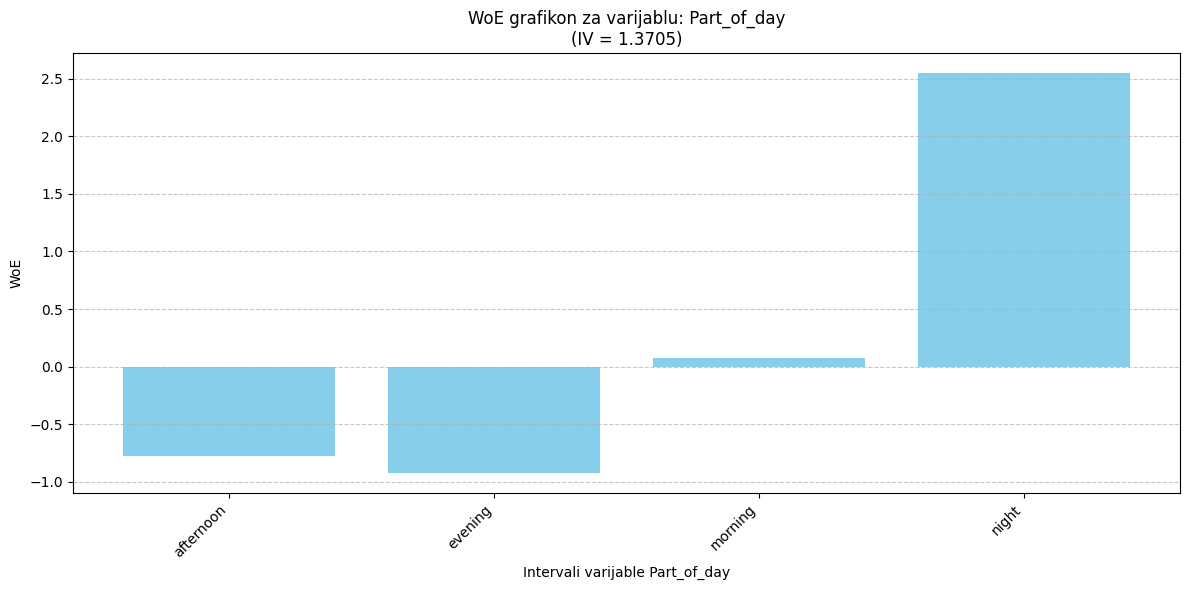

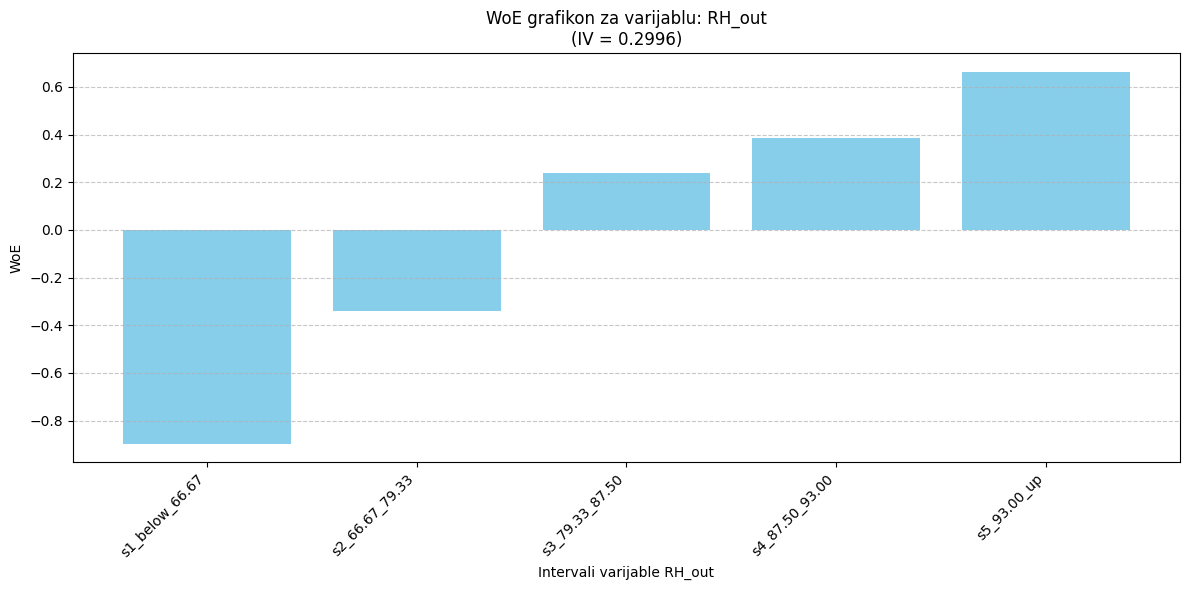

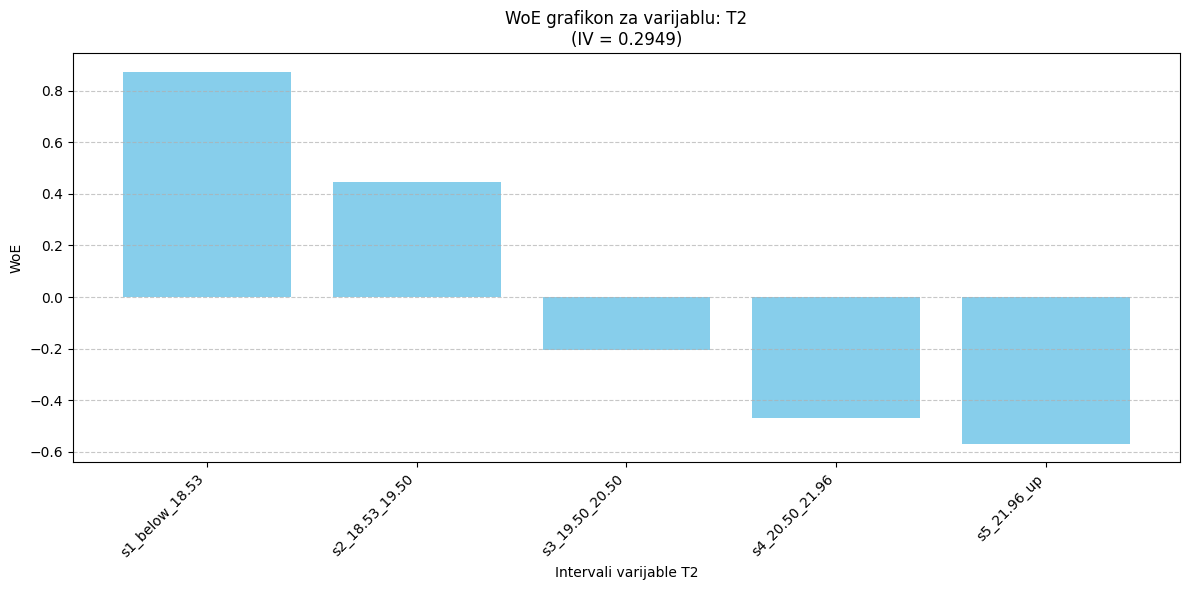

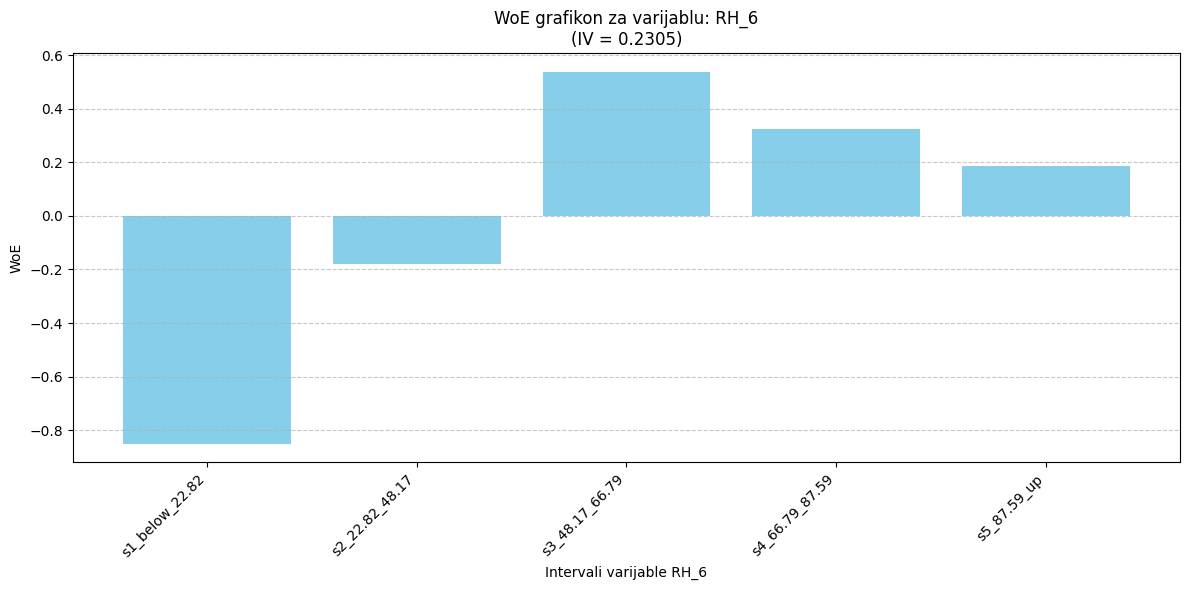

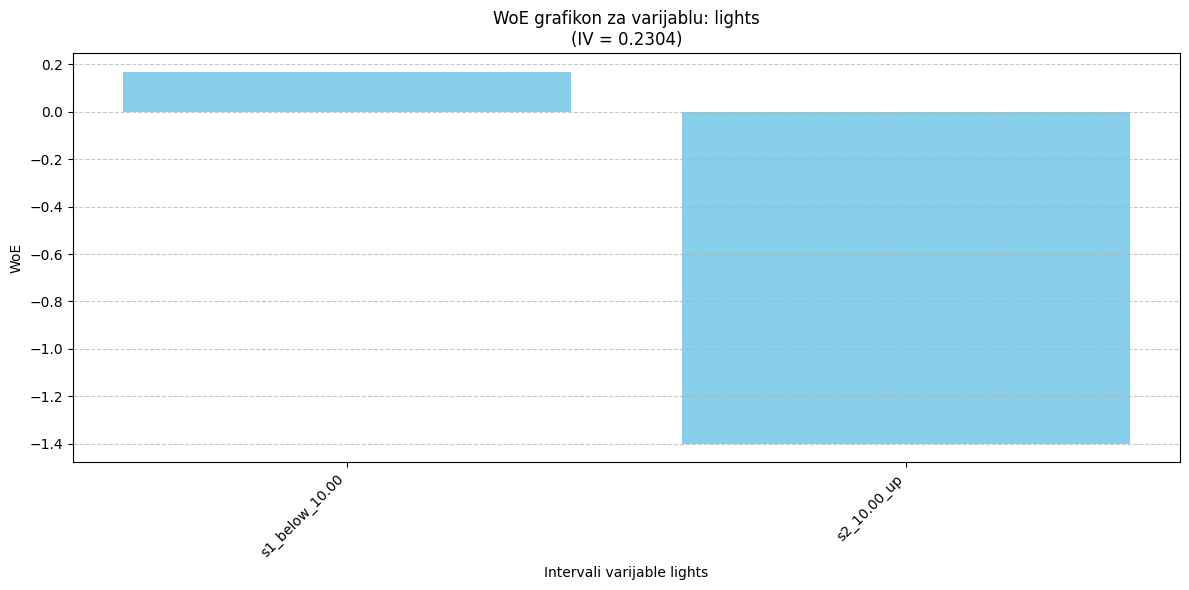

In [15]:
# Odredivanje broja najjačih varijabli po IV vrijednosti
top_n = 5

# Sortiranje iv_dict po IV vrijednosti u padajućem redoslijedu
sorted_iv = sorted(iv_dict.items(), key=lambda x: x[1], reverse=True)
top_features = [item[0] for item in sorted_iv[:top_n]]
display("Top varijable po IV:", top_features)

# Za svaku od odabranih varijabli, dohvacanje pripadajuće WoE tablicu i crtanje bar grafikona
for feature in top_features:
    if feature in woe_dict:
        woe_table = woe_dict[feature].copy()
        
        # Izvlačenje intervala iz indeksa
        interval_labels = woe_table[feature].astype(str)
        
        # Postavljanje WoE grafikona    
        plt.figure(figsize=(12,6))
        plt.bar(range(len(interval_labels)), woe_table['WoE'], color='skyblue')
        plt.xlabel(f'Intervali varijable {feature}')
        plt.ylabel('WoE')
        plt.title(f'WoE grafikon za varijablu: {feature}\n(IV = {iv_dict[feature]:.4f})')
        
        # Postavljanje oznaka intervala na x-osi
        plt.xticks(range(len(interval_labels)), interval_labels, rotation=45, ha='right')
        plt.grid(True, axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Nema WoE podataka za varijablu {feature}")

Grupiranje razreda po kriteriju WoE za najjače varijable


Analiza WoE grupa za varijablu: Part_of_day
Ukupni IV: 1.3705


Part_of_day   WoE                  IV
                            <lambda> count      mean       sum
WoE_Kategorija                                                
Jako negativan  [afternoon, evening]     2 -0.851459  0.356979
Jako pozitivan               [night]     1  2.548240  1.012020
Neutralan                  [morning]     1  0.077106  0.001480

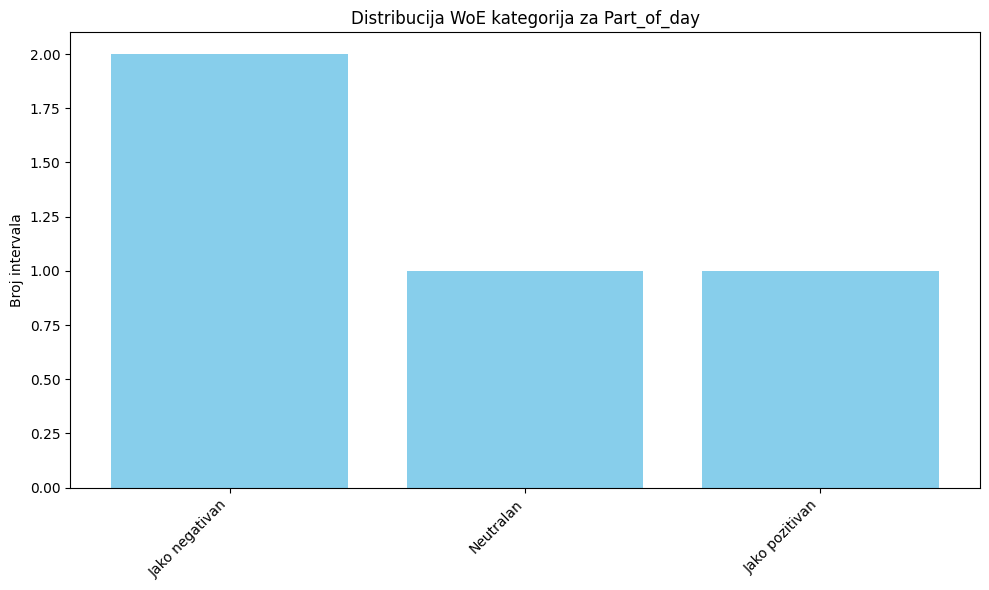


Analiza WoE grupa za varijablu: RH_out
Ukupni IV: 0.2996


RH_out   WoE                  IV
                                            <lambda> count      mean       sum
WoE_Kategorija                                                                
Jako negativan                      [s1_below_66.67]     1 -0.896415  0.156876
Jako pozitivan                         [s5_93.00_up]     1  0.662799  0.077905
Umjereno negativan                  [s2_66.67_79.33]     1 -0.338446  0.023129
Umjereno pozitivan  [s3_79.33_87.50, s4_87.50_93.00]     2  0.312584  0.041685

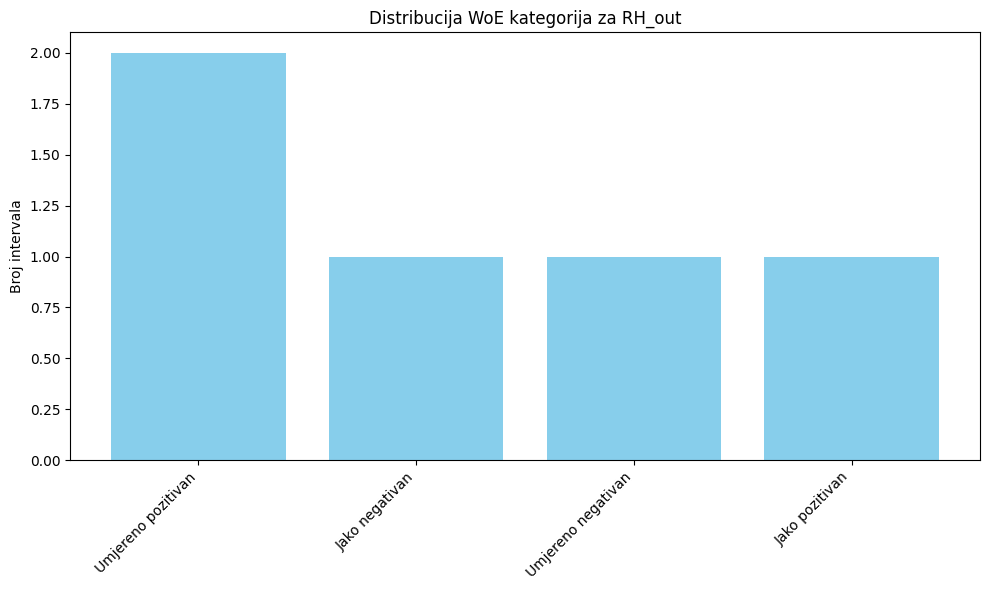


Analiza WoE grupa za varijablu: T2
Ukupni IV: 0.2949


T2   WoE                  IV
                                            <lambda> count      mean       sum
WoE_Kategorija                                                                
Jako negativan                         [s5_21.96_up]     1 -0.569194  0.064432
Jako pozitivan                      [s1_below_18.53]     1  0.873923  0.140198
Umjereno negativan  [s3_19.50_20.50, s4_20.50_21.96]     2 -0.337097  0.051669
Umjereno pozitivan                  [s2_18.53_19.50]     1  0.447042  0.038593

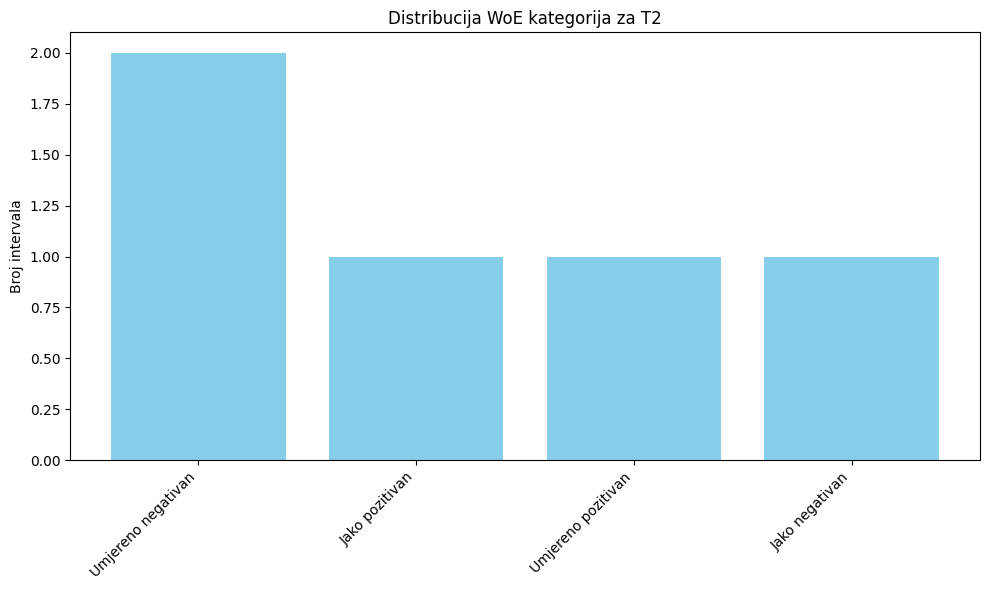


Analiza WoE grupa za varijablu: RH_6
Ukupni IV: 0.2305


RH_6   WoE                  IV
                                         <lambda> count      mean       sum
WoE_Kategorija                                                             
Jako negativan                   [s1_below_22.82]     1 -0.850440  0.141566
Jako pozitivan                   [s3_48.17_66.79]     1  0.537154  0.055061
Neutralan           [s2_22.82_48.17, s5_87.59_up]     2  0.003511  0.013456
Umjereno pozitivan               [s4_66.79_87.59]     1  0.323120  0.020411

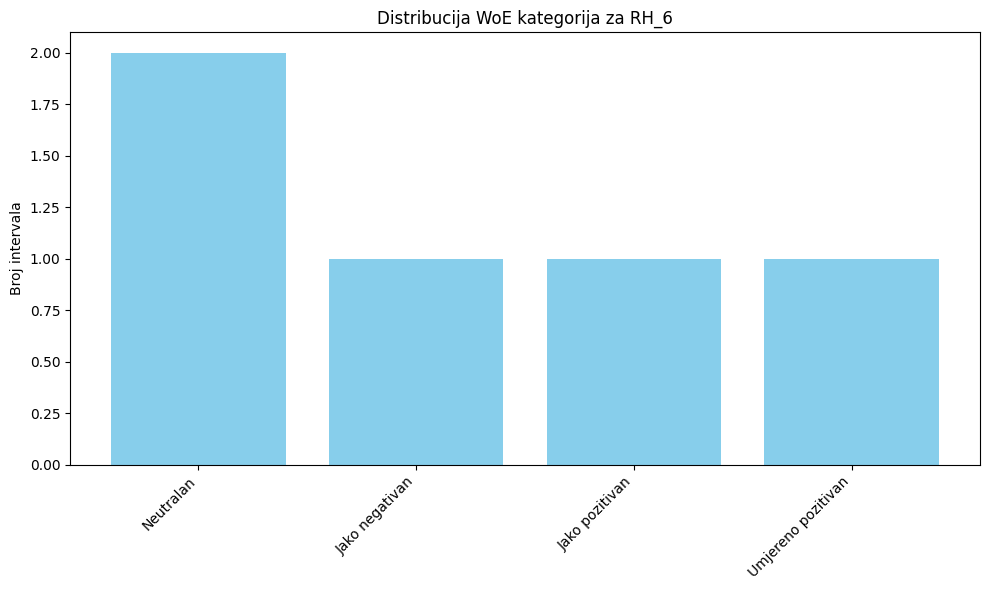


Analiza WoE grupa za varijablu: lights
Ukupni IV: 0.2304


lights   WoE                  IV
                        <lambda> count      mean       sum
WoE_Kategorija                                            
Jako negativan     [s2_10.00_up]     1 -1.399735  0.205711
Neutralan       [s1_below_10.00]     1  0.167701  0.024646

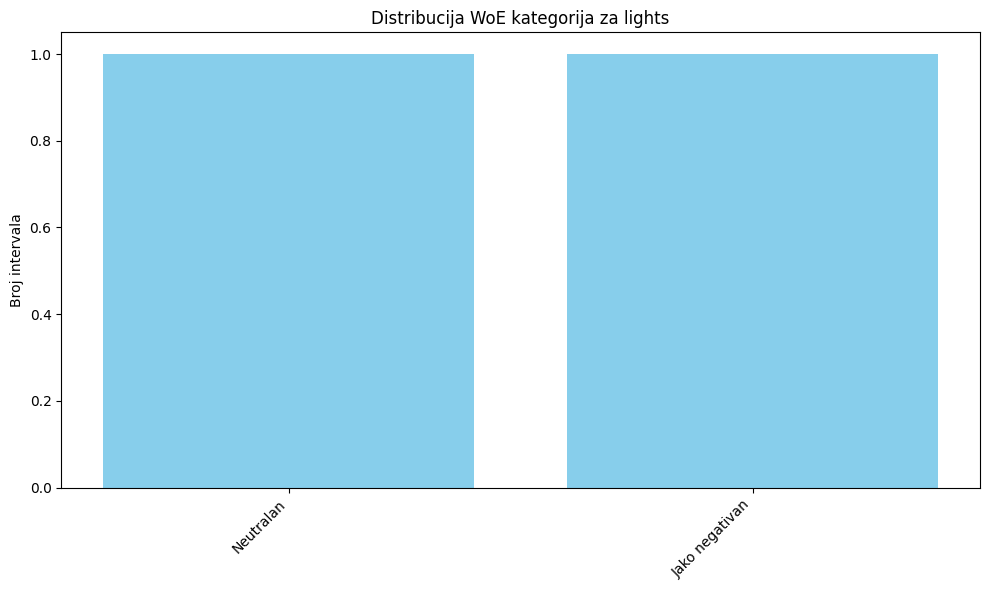

In [16]:
# Funkcija za određivanje jačine WoE
def get_woe_strength(woe):
    if woe <= -0.5: return "Jako negativan"
    elif -0.5 < woe <= -0.2: return "Umjereno negativan"
    elif -0.2 < woe < 0.2: return "Neutralan"
    elif 0.2 <= woe < 0.5: return "Umjereno pozitivan"
    else: return "Jako pozitivan"

# Za svaku od najjačih varijabli, grupiranje razreda prema WoE
for feature in top_features:
    if feature in woe_dict:
        woe_table = woe_dict[feature].copy()
        
        # Dodavanje kategorije WoE
        woe_table['WoE_Kategorija'] = woe_table['WoE'].apply(get_woe_strength)
        
        # Grupiranje po kategorijama
        grouped_woe = woe_table.groupby('WoE_Kategorija').agg({
            feature: lambda x: list(x),
            'WoE': ['count', 'mean'],
            'IV': 'sum'
        })
        
        # Formatiranje rezultata
        print(f"\n{'='*80}")
        print(f"Analiza WoE grupa za varijablu: {feature}")
        print(f"Ukupni IV: {iv_dict[feature]:.4f}")
        print('='*80)
        
        # Prikazivanje grupiranih rezultata
        pd.set_option('display.max_colwidth', None)
        display(grouped_woe)
        
        # Vizualizacija distribucije WoE kategorija
        plt.figure(figsize=(10,6))
        counts = woe_table['WoE_Kategorija'].value_counts()
        plt.bar(counts.index, counts.values, color='skyblue')
        plt.title(f'Distribucija WoE kategorija za {feature}')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Broj intervala')
        plt.tight_layout()
        plt.show()


Spoznaje na temelju analize

Temeljem provedene analize, mogu se izvući sljedeći zaključci o značajnosti i ponašanju varijabli, a osobito onih s najvišim vrijednostima Information Value (IV) i relevantnim Weight of Evidence (WoE) profilima:

1. Varijable s najjačim IV vrijednostima su Part_of_day, RH_out, T2, RH_6 i lights. Visok IV sugerira da ove varijable imaju znatnu sposobnost razdvajanja (segmentacije) između "dobrih" i "loših" primjera (u ovom slučaju, potrošnja energije definirana binarnim ciljem). Drugim riječima, one najbolje objašnjavaju varijabilnost ciljne varijable Appliances.

2. Analiza WoE dodatno razlaže ove varijable u kategorije, odnosno u grupe temeljene na njihovoj raspodjeli Z-vrijednosti, te pokazuje koje vrijednosti unutar pojedinih varijabli imaju najizraženiji utjecaj na rezultat. Primjerice, za varijablu lights WoE tablica je identificirala skup s izrazito negativnim WoE vrijednostima (što implicira da unutar tog intervala postoji jaka povezanost s potrošnjom). Sličan obrazac može se uočiti kod vanjskih mjerenja, poput RH_out i T2, gdje razlike između intervala (npr. između "normalnih" i "ekstremnih" vrijednosti) naglašavaju koliko promjene u tim varijablama utječu na potrošnju.

3. Profili i uzročno-posljedične veze:
    Varijable povezane s vanjskim uvjetima (npr. T2, RH_out, RH_6) sugeriraju da vanjski klimatski uvjeti (temperatura, vlažnost) imaju umjeren utjecaj na potrošnju energije u kućanstvu. Različiti intervali ovih varijabli pokazuju da ekstremne vrijednosti (npr. vrlo visoka ili vrlo niska relativna vlažnost) mogu biti povezane s promjenama u obrascima potrošnje, budući da se energija vjerovatno troši na regulaciju unutarnje temperature ili ventilaciju. Varijabla lights, koja ima relativno visok IV, ukazuje na to da je potrošnja vezana uz rasvjetu također važan faktor. WoE analiza kod ovog prediktora pokazuje da određeni rasponi vrijednosti (intervali u kojima se nalaze ekstremne vrijednosti) imaju drugačiji profil – vjerojatno povezan s načinom korištenja energije u određenim situacijama (npr. radne sate ili sate mirovanja). Varijabla Part_of_day dodatno pokazuje kako se obrasci potrošnje energije mijenjaju tijekom različitih doba dana, pri čemu jutarnje i popodnevne vrijednosti često ukazuju na veći intenzitet korištenja energije. Kategorija "night" kod varijable Part_of_day označava noćno razdoblje u kojem se opaža značajno smanjena potrošnja energije, što sugerira niži intenzitet aktivnosti tijekom noći.

4. Uzročna povezanost i segmentacija:
    Iako korelacije između varijabli i ciljne potrošnje nisu izrazito jake (već su slabe do umjerene), visoke IV vrijednosti sugeriraju da se određene varijable mogu koristiti za prediktivno modeliranje. Drugim riječima, vrijeme u danu, vanjski uvjeti i korištenje rasvjete (lights) mogle bi biti signalne varijable za promjene u ukupnoj potrošnji. WoE pristup pomaže identificirati kako se distribucija vrijednosti unutar pojedinih intervala razlikuje, te time daje uvid u potencijalne “prekidne točke” ili pragove koji su ključni za razumijevanje uzročnosti – primjerice, kada prelazak iz "normalnog" u "ekstremno visok" interval određene varijable značajno mijenja vjerojatnost da će potrošnja biti visoka.

Zaključno, analiza naglašava da su varijable Part_of_day, RH_out, T2, RH_6 i lights najznačajnije u kontekstu objašnjavanja potrošnje energije. Profili njihovih WoE vrijednosti otkrivaju da unutar određenih intervala (posebno onih gdje se pojavljuju ekstremne vrijednosti) postoji jasna segmentacija – što implicira da promjene u tim varijablama mogu biti ključni uzročno-posljedični čimbenici ili indikatori promjena u obrascima potrošnje.



Prijedlozi i rješenja na temelju analize

Na temelju dobivenih IV i WoE analiza, primijetili smo da određene varijable (posebno Part_of_day, RH_out, T2, RH_6 i lights) značajno razlikuju "dobre" od "loših" primjera u kontekstu ciljne varijable (potrošnje energije). Međutim, analiza je također otkrila određene izazove koje je potrebno riješiti kako bi se osiguralo kvalitetnije modeliranje i bolje razumijevanje uzročnih odnosa u podatkovnom skupu. Evo nekoliko konkretnih prijedloga:

1. Fokus na varijable s visokim IV i jasnim WoE profilima  
    Budući da varijable poput Part_of_day, RH_out, T2, RH_6 i lights posjeduju relativno visoke IV vrijednosti, model bi trebao dati poseban naglasak na njih.

2. Optimizacija načina biniranja i transformacije podataka  
    WoE analiza ovisi i o načinu na koji su varijable podijeljene u kategorije (binove). Ako su neke kategorije preširoke ili neodgovarajuće definirane, mogu se propustiti značajne promjene u distribuciji. Moglo bi se razmisliti o primjeni drugačijih transformacija te time mogućeg dobivanja drugačijih rezultata.

3. Rješavanje problema s outlierima i ekstremnim vrijednostima  
    Iz analize utvrđeno je da varijabla lights sadrži 647 ekstremno visokih vrijednosti, dok RH_5 bilježi 567 takvih slučajeva, T2 206, a RH_out 159 ekstremno niskih. S obzirom da je ukupan broj zapisa 19735, ovi outlieri se čine relativno mali, ali su značajan udio koji može narušiti stabilnost modela. Moglo bi se probati koristiti modele koji su otporniji na utjecaj ovih ekstremnih vrijednosti, kako bi se osiguralo kvalitetnije modeliranje i robusnije predikcije.

4. Proučavanje uzročnih mehanizama i segmentacija profila  
    WoE analize pokazuju da se unutar pojedinih intervala pojavljuju različiti profili rizika. Na primjer, kod varijable lights postoje intervali s izrazito negativnim WoE vrijednostima, što implicira snažnu povezanost s nižom potrošnjom. Ovaj uvid može sugerirati da se ponašanje korisnika (npr. intenzitet korištenja rasvjete) u određenim situacijama drastično mijenja. Moglo bi se kreirati zasebne modele za segmente s različitim WoE profilima – tako da se specifične strategije modeliranja primijene na skupine s različitim rizicima.


Zaključno, rješenje problema temelji se ne samo na primjeni standardnih modela, nego i na pažljivom preispitivanju načina na koji su podaci obrađeni i segmentirani. Rezultati ove analize koristit će se za izradu bayesove mreže fokusirajući se na varijable s visokim IV vrijednostima, ali moguće je prilagoditi korištene strategije za biniranje, transformaciju i segmentaciju podataka kako bi se dobili drugačiji i potencijalno precizniji rezultati. Time se postiže bolje uočavanje rizičnih profila, a time i mogućnost izgradnje preciznijih i otpornijih modela koji bolje objašnjavaju varijabilnost potrošnje energije i omogućuju stvaranje kvalitetnijih informacija. 